In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis=1)
y = df.sales

## Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=5,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

## Train | Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
pd.DataFrame(X_train).agg(["mean","std"]).round().T

,mean,std
0,-0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,-0.0,1.0
4,0.0,1.0
5,-0.0,1.0
6,-0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,-0.0,1.0


In [15]:
pd.DataFrame(X_test).agg(["mean","std"]).round().T

,mean,std
0,-0.0,1.0
1,-0.0,1.0
2,-0.0,1.0
3,-0.0,1.0
4,-0.0,1.0
5,-0.0,1.0
6,-0.0,1.0
7,-0.0,1.0
8,-0.0,1.0
9,-0.0,1.0


## Linear Regression 

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression() # normalize:True dersek MinMax scaling ile scale yapar

In [18]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = linear_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [21]:
y_train_pred = linear_model.predict(X_train)

In [22]:
eval_metrics(y_train,y_train_pred)

r2_score: 0.9976072485267145 
 mae: 0.18621293136504943 
 mse: 0.06296801889161993 
 rmse: 0.2509342919802312


In [23]:
eval_metrics(y_test,y_pred)

r2_score: 0.7649897681644745 
 mae: 0.6659594307587141 
 mse: 6.634847380746327 
 rmse: 2.5758197492732924


In [24]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,0.250934,2.575820
mae,0.186213,0.665959
mse,0.062968,6.634847
R2,0.997607,0.764990


In [25]:
pd.DataFrame(poly_features).corr() > 0.95

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
pd.DataFrame(poly_features).corr().style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '10px'})

## Cross Validate

In [27]:
from sklearn.model_selection import cross_validate, cross_val_score

In [28]:
model = LinearRegression()

In [29]:
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [30]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002001,0.002001,-0.280734,-1.994430,-31.328119,-5.597153
2,0.001000,0.001000,0.993019,-0.377066,-0.250648,-0.500647
3,0.001000,0.001000,0.983934,-0.392312,-0.306241,-0.553391
4,0.002001,0.001000,0.825272,-0.979767,-4.402358,-2.098180
5,0.001000,0.001000,0.991181,-0.322253,-0.166869,-0.408496
6,0.001001,0.000999,0.969012,-0.484493,-0.976815,-0.988339
7,0.001001,0.001000,0.992885,-0.327955,-0.144808,-0.380536
8,0.001000,0.000000,0.990130,-0.447015,-0.332058,-0.576244
9,0.000999,0.000000,0.965508,-0.465024,-0.528863,-0.727230
10,0.001000,0.001000,0.990123,-0.324433,-0.197801,-0.444748


In [31]:
pd.DataFrame(scores, index=range(1,11)).mean()

fit_time                            0.001200
score_time                          0.000900
test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [32]:
scores = pd.DataFrame(scores, index=range(1,11))

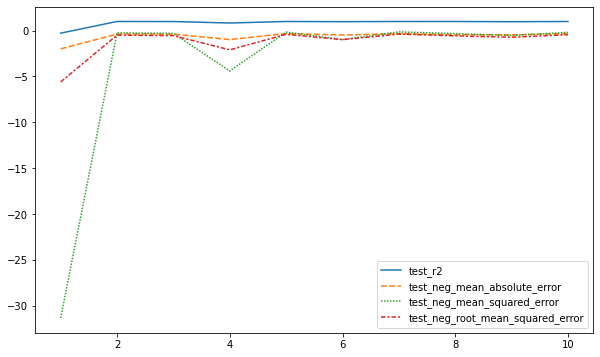

In [33]:
sns.lineplot(data = scores.iloc[:,2:]);

In [34]:
pd.DataFrame(linear_model.coef_)

,0
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge_model = Ridge(alpha=1)

In [37]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [38]:
y_pred = ridge_model.predict(X_test)

In [39]:
eval_metrics(y_test,y_pred)

r2_score: 0.9825113234815027 
 mae: 0.48244626387334943 
 mse: 0.49374318166997705 
 rmse: 0.7026686144050956


In [40]:
y_train_pred = ridge_model.predict(X_train)

In [41]:
eval_metrics(y_train,y_train_pred)

r2_score: 0.9886773159501692 
 mae: 0.3381492653410181 
 mse: 0.2979695096267512 
 rmse: 0.5458658348227623


In [42]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,0.545866,0.702669
mae,0.338149,0.482446
mse,0.297970,0.493743
R2,0.988677,0.982511


In [43]:
pd.concat([ls,rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,0.250934,2.575820,0.545866,0.702669
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
R2,0.997607,0.764990,0.988677,0.982511


## for ridge regression CV with alpha : 1

In [44]:
model = Ridge(alpha = 1)
scores = cross_validate(model, X_train, y_train,
                         scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [45]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.989194,-0.430312,-0.264330,-0.514130
2,0.988294,-0.399467,-0.420281,-0.648291
3,0.980399,-0.419370,-0.373627,-0.611250
4,0.965854,-0.656779,-0.860334,-0.927542
5,0.991450,-0.343240,-0.161785,-0.402224
6,0.919753,-0.723583,-2.529543,-1.590454
7,0.993011,-0.290596,-0.142237,-0.377144
8,0.990300,-0.434471,-0.326317,-0.571241
9,0.975828,-0.443009,-0.370636,-0.608799
10,0.991642,-0.269488,-0.167392,-0.409136


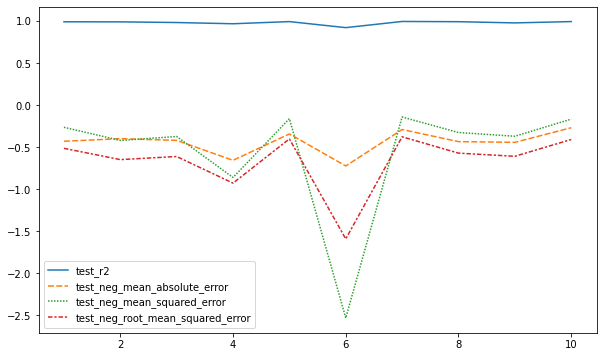

In [46]:
sns.lineplot(data = scores.iloc[:,2:]);

## Choosing the best alpha value with Cross-Validation

In [47]:
from sklearn.linear_model import RidgeCV

In [48]:
alpha_space = np.linspace(0.01,0.5,100)

In [49]:
alpha_space

array([0.01      , 0.01494949, 0.01989899, 0.02484848, 0.02979798,
       0.03474747, 0.03969697, 0.04464646, 0.04959596, 0.05454545,
       0.05949495, 0.06444444, 0.06939394, 0.07434343, 0.07929293,
       0.08424242, 0.08919192, 0.09414141, 0.09909091, 0.1040404 ,
       0.1089899 , 0.11393939, 0.11888889, 0.12383838, 0.12878788,
       0.13373737, 0.13868687, 0.14363636, 0.14858586, 0.15353535,
       0.15848485, 0.16343434, 0.16838384, 0.17333333, 0.17828283,
       0.18323232, 0.18818182, 0.19313131, 0.19808081, 0.2030303 ,
       0.2079798 , 0.21292929, 0.21787879, 0.22282828, 0.22777778,
       0.23272727, 0.23767677, 0.24262626, 0.24757576, 0.25252525,
       0.25747475, 0.26242424, 0.26737374, 0.27232323, 0.27727273,
       0.28222222, 0.28717172, 0.29212121, 0.29707071, 0.3020202 ,
       0.3069697 , 0.31191919, 0.31686869, 0.32181818, 0.32676768,
       0.33171717, 0.33666667, 0.34161616, 0.34656566, 0.35151515,
       0.35646465, 0.36141414, 0.36636364, 0.37131313, 0.37626

In [50]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [51]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([0.01      , 0.01494949, 0.01989899, 0.02484848, 0.02979798,
       0.03474747, 0.03969697, 0.04464646, 0.04959596, 0.05454545,
       0.05949495, 0.06444444, 0.06939394, 0.07434343, 0.07929293,
       0.08424242, 0.08919192, 0.09414141, 0.09909091, 0.1040404 ,
       0.1089899 , 0.11393939, 0.11888889, 0.12383838, 0.12878788,
       0.13373737, 0.13868687, 0.14363636, 0.14858586, 0.15353535,
       0.1584...
       0.35646465, 0.36141414, 0.36636364, 0.37131313, 0.37626263,
       0.38121212, 0.38616162, 0.39111111, 0.39606061, 0.4010101 ,
       0.4059596 , 0.41090909, 0.41585859, 0.42080808, 0.42575758,
       0.43070707, 0.43565657, 0.44060606, 0.44555556, 0.45050505,
       0.45545455, 0.46040404, 0.46535354, 0.47030303, 0.47525253,
       0.48020202, 0.48515152, 0.49010101, 0.49505051, 0.5       ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [52]:
ridge_cv_model.alpha_

0.0198989898989899

In [53]:
y_pred = ridge_cv_model.predict(X_test)

In [54]:
eval_metrics(y_test,y_pred)

r2_score: 0.9836436441138451 
 mae: 0.4420180290403394 
 mse: 0.46177532000291777 
 rmse: 0.6795405212369


In [55]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train,y_train_pred)

r2_score: 0.9944957197466294 
 mae: 0.2447894522576625 
 mse: 0.14485149287279922 
 rmse: 0.38059360592737135


In [56]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,0.380594,0.679541
mae,0.244789,0.442018
mse,0.144851,0.461775
R2,0.994496,0.983644


In [57]:
pd.DataFrame(ridge_cv_model.coef_)

,0
0,6.388514
1,0.708552
2,0.478208
3,-8.031779
4,3.999304
5,-0.716134
6,-0.507441
7,0.727489
8,-0.881533
9,2.255991


## Choosing an alpha value with Yellowbricks

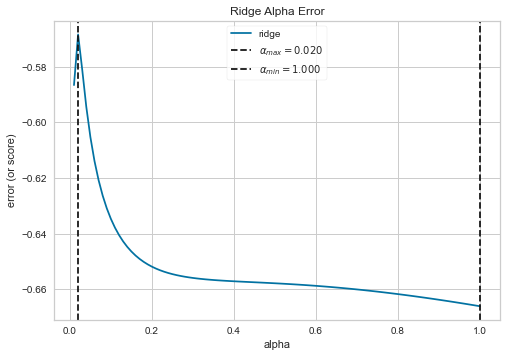

In [58]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 1, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv = 10,
    scoring = "neg_root_mean_squared_error"
)
visualizer.fit(X_train, y_train)
visualizer.show();

## Lasso Model

In [59]:
from sklearn.linear_model import Lasso, LassoCV

In [60]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

In [61]:
y_train_pred = lasso_model.predict(X_train)

In [62]:
eval_metrics(y_train,y_train_pred)

r2_score: 0.919650453855065 
 mae: 1.0183549117463373 
 mse: 2.1144911187286946 
 rmse: 1.4541289897147


In [63]:
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.9185896601157192 
 mae: 1.0179586607877589 
 mse: 2.2983900578631644 
 rmse: 1.5160442136900771


In [64]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,1.454129,1.516044
mae,1.018355,1.017959
mse,2.114491,2.298390
R2,0.919650,0.918590


In [65]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380594,0.679541,1.454129,1.516044
mae,0.186213,0.665959,0.338149,0.482446,0.244789,0.442018,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144851,0.461775,2.114491,2.298390
R2,0.997607,0.764990,0.988677,0.982511,0.994496,0.983644,0.919650,0.918590


## for lasso regression CV with alpha : 1

In [66]:
model = Lasso()
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [67]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.955947,-0.888044,-1.077594,-1.038072
2,0.903583,-1.372171,-3.461746,-1.860577
3,0.968382,-0.565185,-0.602683,-0.776327
4,0.938413,-0.813635,-1.551711,-1.245677
5,0.943817,-0.847035,-1.063069,-1.031052
6,0.829658,-1.304584,-5.369549,-2.317229
7,0.955279,-0.689034,-0.910175,-0.954031
8,0.857451,-1.790809,-4.795721,-2.189913
9,0.920257,-0.901485,-1.222707,-1.105761
10,0.887138,-1.218712,-2.260339,-1.503442


<AxesSubplot:>

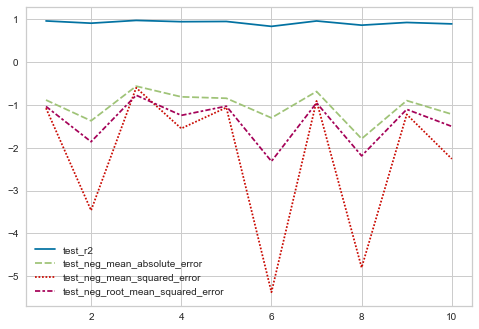

In [68]:
sns.lineplot(data = scores.iloc[:,2:])

In [69]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [70]:
eval_metrics(y_test, y_pred)

r2_score: 0.9185896601157192 
 mae: 1.0179586607877589 
 mse: 2.2983900578631644 
 rmse: 1.5160442136900771


In [71]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [72]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

## Choosing best alpha value with Cross-Validation

In [73]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [74]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [75]:
lasso_cv_model.alpha_

0.01

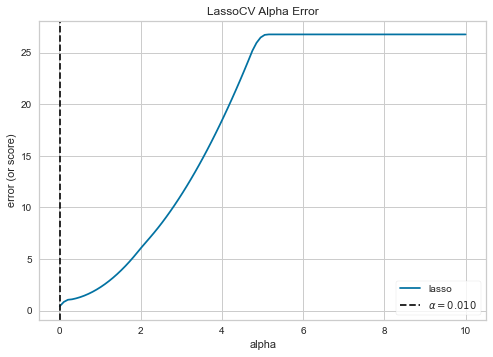

In [76]:
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

In [77]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

r2_score: 0.9888244250353099 
 mae: 0.33906533633271696 
 mse: 0.2940981641252705 
 rmse: 0.5423081818719597


In [78]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9862951034658218 
 mae: 0.4409752004680382 
 mse: 0.3869188850331829 
 rmse: 0.6220280419990588


In [79]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [80]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [81]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [82]:
pd.concat([lsm_df, lcm_df], axis = 1)

,lasso_coef_1,lasso_cv_coef_0.01
0,0.696016,4.270214
1,0.000000,0.180374
2,0.000000,0.139659
3,0.000000,-3.146055
4,3.490946,4.153400
5,0.000000,-0.000000
6,0.000000,0.000000
7,0.000000,0.062497
8,0.000000,0.000000
9,0.000000,-0.000000
